In [495]:
import pandas as pd
import lightgbm as lgb
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

from matplotlib import gridspec

warnings.filterwarnings(action='ignore')

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
movieEDA = pd.read_excel('all_movies.xlsx')
movieEDA

C:\Users\chlwl\AppData\Local\Temp\ipykernel_8320\2706472893.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  movieEDA = pd.read_excel('all_movies.xlsx')


,Unnamed: 0,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,0,1,디워,2007-08-01,49339934700,0.054,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,1,2,트랜스포머,2007-06-28,47619379338,0.052,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,2,3,화려한 휴가,2007-07-25,44098449600,0.048,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,3,4,스파이더맨 3,2007-05-01,29511658000,0.032,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.032,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,442,146,부활,2020-07-09,77018250,0,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름
2243,443,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2244,444,148,테넷,2020-08-26,84602320,0,8957,32,1374,미국,미국,워너브러더스 코리아(주),12세 관람가,"액션, SF",150.0,크리스토퍼 놀란,8.0,여름
2245,445,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


In [6]:
movieEDA=movieEDA.drop('Unnamed: 0', axis=1)
movieEDA

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.054,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,2,트랜스포머,2007-06-28,47619379338,0.052,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.048,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.032,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.032,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,146,부활,2020-07-09,77018250,0,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름
2243,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2244,148,테넷,2020-08-26,84602320,0,8957,32,1374,미국,미국,워너브러더스 코리아(주),12세 관람가,"액션, SF",150.0,크리스토퍼 놀란,8.0,여름
2245,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


In [7]:
# 중복 내용 영화

movieEDA[movieEDA.duplicated(['영화명'])]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
211,62,황금 나침반,2007-12-18,3769841000,0.004,609371,293,19115,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,판타지,113.0,크리스 웨이츠,12.0,겨울
219,70,내셔널 트레져:비밀의 책,2007-12-19,3582870500,0.004,543996,264,14592,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,모험,124.0,존 터틀타웁,12.0,겨울
236,87,색즉시공 시즌2,2007-12-12,2034600000,0.002,299326,208,9466,한국,한국,CJ ENM,청소년 관람불가,코미디,115.0,윤태윤,12.0,겨울
242,93,어거스트 러쉬,2007-11-29,1787776500,0.002,271678,126,6631,미국,미국,"(주)영화사 그램,CJ ENM",전체 관람가,드라마,113.0,커스틴 쉐리단,11.0,가을
263,114,아메리칸 갱스터,2007-12-27,1315594500,0.001,191510,200,6267,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),청소년 관람불가,범죄,156.0,리들리 스콧,12.0,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,135,호빗: 뜻밖의 여정,2012-12-13,126902600,0,11621,99,637,미국,"미국,뉴질랜드",워너브러더스 코리아(주),12세 관람가,"판타지, 모험",169.0,피터 잭슨,12.0,겨울
2233,137,페이트 스테이 나이트 헤븐즈필 제3장 스프링 송,2020-10-22,91472790,0,11236,38,922,일본,일본,(주)애니플러스,15세 관람가,"애니메이션, 액션, 판타지",122.0,스도 토모노리,10.0,가을
2239,143,팅커 테일러 솔저 스파이,2012-02-09,82005200,0,9584,146,1762,영국,"영국,프랑스,독일","(주)드림팩트엔터테인먼트,팝엔터테인먼트",15세 관람가,스릴러,127.0,토마스 알프레드슨,2.0,겨울
2242,146,부활,2020-07-09,77018250,0,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름


In [8]:
movieEDA[movieEDA['영화명']=='황금 나침반']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
14,15,황금 나침반,2007-12-18,14566840000,0.016,2297587,492,33593,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,판타지,113.0,크리스 웨이츠,12.0,겨울
211,62,황금 나침반,2007-12-18,3769841000,0.004,609371,293,19115,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,판타지,113.0,크리스 웨이츠,12.0,겨울


In [10]:
# 중복 영화 제거

movieEDA = movieEDA.drop_duplicates(['영화명'])
movieEDA

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.054,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,2,트랜스포머,2007-06-28,47619379338,0.052,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.048,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.032,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.032,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,144,잃어버린 얼굴 1895,2021-02-24,135487000,0,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"뮤지컬, 공연실황",148.0,이지나,2.0,겨울
2241,145,브리짓 존스의 일기,2001-09-01,63593240,0,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스, 코미디",107.0,샤론 맥과이어,9.0,가을
2243,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2245,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


In [11]:
# 인덱스 다시 정렬

movieEDA = movieEDA.reset_index()
movieEDA

,index,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,0,1,디워,2007-08-01,49339934700,0.054,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,1,2,트랜스포머,2007-06-28,47619379338,0.052,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,2,3,화려한 휴가,2007-07-25,44098449600,0.048,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,3,4,스파이더맨 3,2007-05-01,29511658000,0.032,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.032,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,2240,144,잃어버린 얼굴 1895,2021-02-24,135487000,0,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"뮤지컬, 공연실황",148.0,이지나,2.0,겨울
2082,2241,145,브리짓 존스의 일기,2001-09-01,63593240,0,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스, 코미디",107.0,샤론 맥과이어,9.0,가을
2083,2243,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2084,2245,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


In [12]:
# 데이터 셔플

movieShuffle = movieEDA.sample(frac=1).reset_index(drop=True)
movieShuffle

,index,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1875,76,해피 데스데이 2 유,2019-02-14,3437809200,0.002,412850,657,18254,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,"공포, 코미디",100.0,크리스토퍼 랜던,2.0,겨울
1,1677,28,목격자,2018-08-15,21737061097,0.012,2524720,1021,71403,한국,한국,(주)넥스트엔터테인먼트월드(NEW),15세 관람가,스릴러,111.0,조규장,8.0,여름
2,177,28,나니아 연대기:캐스피언 왕자,2008-05-15,9236619000,0.01,1468903,604,43010,미국,"미국,영국",한국소니픽쳐스릴리징브에나비스타영화㈜,전체 관람가,판타지,145.0,앤드류 애덤슨,5.0,봄
3,39,40,그 여자 작사 그 남자 작곡,2007-02-28,6759412500,0.007,1063950,153,28830,미국,미국,"주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)",12세 관람가,멜로/로맨스,103.0,마크 로렌스,2.0,겨울
4,1529,30,박열,2017-06-28,18093639795,0.011,2359206,1176,78499,한국,한국,플러스엠 엔터테인먼트,12세 관람가,드라마,129.0,이준익,6.0,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,272,123,찰리윌슨의 전쟁,2008-02-06,1128961000,0.001,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,드라마,97.0,마이크 니콜스,2.0,겨울
2082,228,79,헬보이 2 : 골든 아미,2008-09-25,2572551500,0.003,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,SF,120.0,길예르모 델 토로,9.0,가을
2083,1421,72,아이스 에이지: 지구 대충돌,2016-07-20,4092484600,0.002,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,애니메이션,94.0,마이크 트메이어,7.0,여름
2084,743,144,Mr.아이돌,2011-11-03,515508500,0,74261,311,8669,한국,한국,"롯데쇼핑㈜롯데엔터테인먼트,(주)시너지하우스 (시너지)",12세 관람가,드라마,114.0,라희찬,11.0,가을


In [13]:
# index 컬럼 삭제

movieShuffle=movieShuffle.drop('index', axis=1)
movieShuffle

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,76,해피 데스데이 2 유,2019-02-14,3437809200,0.002,412850,657,18254,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,"공포, 코미디",100.0,크리스토퍼 랜던,2.0,겨울
1,28,목격자,2018-08-15,21737061097,0.012,2524720,1021,71403,한국,한국,(주)넥스트엔터테인먼트월드(NEW),15세 관람가,스릴러,111.0,조규장,8.0,여름
2,28,나니아 연대기:캐스피언 왕자,2008-05-15,9236619000,0.01,1468903,604,43010,미국,"미국,영국",한국소니픽쳐스릴리징브에나비스타영화㈜,전체 관람가,판타지,145.0,앤드류 애덤슨,5.0,봄
3,40,그 여자 작사 그 남자 작곡,2007-02-28,6759412500,0.007,1063950,153,28830,미국,미국,"주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)",12세 관람가,멜로/로맨스,103.0,마크 로렌스,2.0,겨울
4,30,박열,2017-06-28,18093639795,0.011,2359206,1176,78499,한국,한국,플러스엠 엔터테인먼트,12세 관람가,드라마,129.0,이준익,6.0,여름
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,123,찰리윌슨의 전쟁,2008-02-06,1128961000,0.001,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,드라마,97.0,마이크 니콜스,2.0,겨울
2082,79,헬보이 2 : 골든 아미,2008-09-25,2572551500,0.003,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,SF,120.0,길예르모 델 토로,9.0,가을
2083,72,아이스 에이지: 지구 대충돌,2016-07-20,4092484600,0.002,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,애니메이션,94.0,마이크 트메이어,7.0,여름
2084,144,Mr.아이돌,2011-11-03,515508500,0,74261,311,8669,한국,한국,"롯데쇼핑㈜롯데엔터테인먼트,(주)시너지하우스 (시너지)",12세 관람가,드라마,114.0,라희찬,11.0,가을


In [14]:
# train, test

train = movieShuffle[:1251]
test = movieShuffle[1251:]

In [15]:
# test 매출액 삭제

test = test.drop('매출액', axis=1)
test

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1251,73,샴,2007-07-17,0.003,496084,145,12084,태국,태국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,공포,93.0,반종 피산다나쿤,7.0,여름
1252,135,라스트 엑소시즘,2010-12-01,0.001,103410,171,8016,미국,미국,(주)시너지하우스 (시너지),15세 관람가,공포,88.0,에드 게스-도넬리,12.0,겨울
1253,88,건파우더 밀크셰이크,2021-09-08,0.001,37496,542,7867,프랑스,프랑스,(주)씨제이이엔엠,청소년 관람불가,액션,115.0,나봇 파푸샤도,9.0,가을
1254,105,남과 여,2016-02-25,0.001,203775,449,9790,한국,한국,(주)쇼박스,청소년 관람불가,멜로/로맨스,115.0,이윤기,2.0,겨울
1255,33,피끓는 청춘,2014-01-22,0.80%,1676040,679,36082,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,코미디,121.0,이연우,1.0,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,123,찰리윌슨의 전쟁,2008-02-06,0.001,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,드라마,97.0,마이크 니콜스,2.0,겨울
2082,79,헬보이 2 : 골든 아미,2008-09-25,0.003,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,SF,120.0,길예르모 델 토로,9.0,가을
2083,72,아이스 에이지: 지구 대충돌,2016-07-20,0.002,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,애니메이션,94.0,마이크 트메이어,7.0,여름
2084,144,Mr.아이돌,2011-11-03,0,74261,311,8669,한국,한국,"롯데쇼핑㈜롯데엔터테인먼트,(주)시너지하우스 (시너지)",12세 관람가,드라마,114.0,라희찬,11.0,가을


In [16]:
# shape

print(train.shape)
print(test.shape)

(1251, 17)
(835, 16)


In [40]:
# index reset

train = train.reset_index()
test = test.reset_index()

In [42]:
# 'index' 컬럼 삭제

train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [46]:
# 'level_0' 컬럼 삭제

train = train.drop('level_0', axis=1)

### train 정보

In [49]:
# info로 null 값 확인하기

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       1251 non-null   int64         
 1   영화명      1251 non-null   object        
 2   개봉일      1251 non-null   datetime64[ns]
 3   매출액      1251 non-null   int64         
 4   매출액 점유율  1251 non-null   object        
 5   관객수      1251 non-null   int64         
 6   스크린수     1251 non-null   int64         
 7   상영횟수     1251 non-null   int64         
 8   대표국적     1251 non-null   object        
 9   국적       1251 non-null   object        
 10  배급사      1251 non-null   object        
 11  연령등급     1251 non-null   object        
 12  장르       1251 non-null   object        
 13  러닝타임     1251 non-null   int64         
 14  감독       1251 non-null   object        
 15  개봉월      1251 non-null   int64         
 16  계절       1251 non-null   object        
dtypes: datetime64[ns](1), int64(7), o

In [18]:
train[train['개봉일'].isna()]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1132,100,뽀로로 극장판 눈요정 마을 대모험,NaT,1160549300,0.10%,231875,181,4990,한국,한국,NaN,전체 관람가,애니메이션,35.0,김현호,NaN,가을


In [19]:
train[train['배급사'].isna()]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1132,100,뽀로로 극장판 눈요정 마을 대모험,NaT,1160549300,0.10%,231875,181,4990,한국,한국,NaN,전체 관람가,애니메이션,35.0,김현호,NaN,가을


In [20]:
train[train['연령등급'].isna()]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
854,51,애나벨,2014-10-02,7083492943,0.50%,926027,464,29000,미국,미국,워너브러더스 코리아(주),NaN,공포,99.0,안토니오 트라쇼라스,10.0,가을


In [21]:
train[train['개봉월'].isna()]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1132,100,뽀로로 극장판 눈요정 마을 대모험,NaT,1160549300,0.10%,231875,181,4990,한국,한국,NaN,전체 관람가,애니메이션,35.0,김현호,NaN,가을


In [22]:
# null 값 입력

train['개봉일'][1132] = '2014-12-11'
train['배급사'][1132] = '월리코기'
train['연령등급'][854] = '15세 관람가'
train['개봉월'][1132] = 12.0

C:\Users\chlwl\AppData\Local\Temp\ipykernel_8320\2536101773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['개봉일'][1132] = '2014-12-11'
C:\Users\chlwl\AppData\Local\Temp\ipykernel_8320\2536101773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['배급사'][1132] = '월리코기'
C:\Users\chlwl\AppData\Local\Temp\ipykernel_8320\2536101773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['연령등급'][854] = '15세 관람가'
C:\Users\c

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       1251 non-null   int64         
 1   영화명      1251 non-null   object        
 2   개봉일      1251 non-null   datetime64[ns]
 3   매출액      1251 non-null   int64         
 4   매출액 점유율  1251 non-null   object        
 5   관객수      1251 non-null   int64         
 6   스크린수     1251 non-null   int64         
 7   상영횟수     1251 non-null   int64         
 8   대표국적     1251 non-null   object        
 9   국적       1251 non-null   object        
 10  배급사      1251 non-null   object        
 11  연령등급     1251 non-null   object        
 12  장르       1251 non-null   object        
 13  러닝타임     1251 non-null   float64       
 14  감독       1251 non-null   object        
 15  개봉월      1251 non-null   float64       
 16  계절       1251 non-null   object        
dtypes: datetime64[ns](1), float64(2),

### test 정보

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 1251 to 2085
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       835 non-null    int64         
 1   영화명      835 non-null    object        
 2   개봉일      835 non-null    datetime64[ns]
 3   매출액 점유율  835 non-null    object        
 4   관객수      835 non-null    int64         
 5   스크린수     835 non-null    int64         
 6   상영횟수     835 non-null    int64         
 7   대표국적     835 non-null    object        
 8   국적       835 non-null    object        
 9   배급사      834 non-null    object        
 10  연령등급     835 non-null    object        
 11  장르       835 non-null    object        
 12  러닝타임     834 non-null    float64       
 13  감독       835 non-null    object        
 14  개봉월      835 non-null    float64       
 15  계절       835 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 104.5+ K

In [31]:
test[test['배급사'].isna()]

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1681,100,메로엣타의 반짝반짝 음악회,2012-12-19,0.001,273298,237,4729,일본,일본,NaN,전체 관람가,애니메이션,20.0,유야마 쿠니히코,12.0,겨울


In [32]:
test[test['러닝타임'].isna()]

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1397,52,미스터트롯: 더 무비,2020-10-22,0.003,150090,449,15980,한국,한국,(주)영화사 그램,전체 관람가,공연실황,NaN,전수경,10.0,가을


In [33]:
# null 값 입력

test['배급사'][1681] = 'CJ 엔터테인먼트'
test['러닝타임'][1397] = 119

C:\Users\chlwl\AppData\Local\Temp\ipykernel_8320\1673359322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['배급사'][1681] = 'CJ 엔터테인먼트'
C:\Users\chlwl\AppData\Local\Temp\ipykernel_8320\1673359322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['러닝타임'][1397] = 119


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       835 non-null    int64         
 1   영화명      835 non-null    object        
 2   개봉일      835 non-null    datetime64[ns]
 3   매출액 점유율  835 non-null    object        
 4   관객수      835 non-null    int64         
 5   스크린수     835 non-null    int64         
 6   상영횟수     835 non-null    int64         
 7   대표국적     835 non-null    object        
 8   국적       835 non-null    object        
 9   배급사      835 non-null    object        
 10  연령등급     835 non-null    object        
 11  장르       835 non-null    object        
 12  러닝타임     835 non-null    int64         
 13  감독       835 non-null    object        
 14  개봉월      835 non-null    int64         
 15  계절       835 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(9)
memory usage: 104.5+ KB


In [51]:
# train, test 저장

train.to_excel('train.xlsx', index=False)
test.to_excel('test.xlsx', index=False)

In [113]:
# 열기

train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

### 장르 매출액 비교
- 1. 장르의 이상치를 확인한 후 수정
- 2. 장르의 갯수 간략화
- ※ 장르의 갯수는 train, test 동일하게 조정

In [166]:
# group by

train[['장르', '매출액']].groupby('장르').mean().sort_values('매출액', ascending = False)

,매출액
장르,
SF,12856985530.5
액션,12263987726.3
전쟁,11918439312.3
범죄,11788141246.7
모험,10698877534.0
드라마,9765758876.7
미스터리,9089697477.6
느와르,8946495025.7
판타지,8251049236.4


In [167]:
train[train['장르'] == '서사']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절


In [155]:
# 평균의 오류가 생길 수 있기에 장르 드라마로 변경

train['장르'][858] = '드라마'

In [158]:
train[train['장르'] == '대한민국']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
44,134,바람이 분다,2013-09-05,747245500,0.00%,106439,288,6684,일본,일본,롯데쇼핑㈜롯데엔터테인먼트,<dd>17분</dd>,대한민국,0,홍유정,9,가을
873,34,명당,2018-09-19,17900775524,0.0,2087474,1117,58450,한국,한국,플러스엠 엔터테인먼트,12세 관람가,대한민국,126,박희곤,9,가을
1109,89,번 더 스테이지: 더 무비,2018-11-15,2671391900,0.0,315010,243,4714,한국,한국,월트디즈니컴퍼니코리아 유한책임회사,전체 관람가,대한민국,83,박준수,11,가을


In [157]:
train.loc[858]

순위                           9
영화명                       덕혜옹주
개봉일        2016-08-03 00:00:00
매출액                44393828109
매출액 점유율                    0.0
관객수                    5599229
스크린수                       964
상영횟수                     97312
대표국적                        한국
국적                          한국
배급사              롯데쇼핑㈜롯데엔터테인먼트
연령등급                   12세 관람가
장르                         드라마
러닝타임                       127
감독                         허진호
개봉월                          8
계절                          여름
Name: 858, dtype: object

In [159]:
train['장르'][44] = '애니메이션'
train['장르'][873] = '드라마'
train['장르'][1109] = '다큐멘터리'

In [160]:
train[train['장르'] == '미국']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
426,115,트론: 새로운 시작,2010-12-29,1469097300,0.0,131307,379,5909,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,미국,125,조셉 코신스키,12,겨울


In [161]:
train['장르'][426] = '액션'

In [162]:
train[['장르', '매출액']].groupby('장르').mean().sort_values('매출액', ascending = False)

,매출액
장르,
SF,12856985530.5
액션,12263987726.3
전쟁,11918439312.3
범죄,11788141246.7
모험,10698877534.0
드라마,9765758876.7
미스터리,9089697477.6
느와르,8946495025.7
판타지,8251049236.4


In [163]:
len(train['장르'].value_counts())

18

### 연령등급 매출액 비교

In [89]:
train[['연령등급', '매출액']].groupby('연령등급').mean().sort_values('매출액', ascending = False)

,매출액
연령등급,
12세 관람가,11629652722.9
15세 관람가,9631325346.0
청소년 관람불가,5711569274.0
전체 관람가,5026260200.5
PG,4547715000.0
대한민국,3293262500.0
미국,1846221000.0
"<dd>10.0 <span class=""bg_point per100""><span class=""ico_point""></span></span></dd>",1497601500.0
<dd>17분</dd>,747245500.0


In [169]:
train[train['연령등급']=='PG']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
789,53,몬스터 vs 에이리언,2009-04-23,4547715000,0.0,661366,328,18203,미국,미국,CJ ENM,PG,SF,94,롭 레터맨,4,봄


In [170]:
train['연령등급'][789] = '전체 관람가'

In [171]:
train[train['연령등급']=='대한민국']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
99,80,캐치미,2013-12-18,3293262500,0.20%,480434,517,16151,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,대한민국,액션,12,이현우,12,겨울


In [172]:
train['연령등급'][99] = '12세 관람가'
train['장르'][99] = '코미디'
train['감독'][99] = '이현종'

In [173]:
train[train['연령등급']=='미국']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
422,94,눈의 여왕,2013-02-07,1846221000,0.10%,276913,316,6528,러시아,러시아,(주)넥스트엔터테인먼트월드(NEW),미국,드라마,15,아담 갠저,2,겨울


In [174]:
train['연령등급'][422] = '전체 관람가'
train['장르'][422] = '애니메이션'
train['감독'][422] = '블라드 바르베'

In [176]:
train[train['연령등급']=='<dd>10.0 <span class="bg_point per100"><span class="ico_point"></span></span></dd>']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
648,108,비행기,2013-12-19,1497601500,0.10%,209653,408,5620,미국,미국,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),"<dd>10.0 <span class=""bg_point per100""><span c...",애니메이션,92,전체,12,겨울


In [177]:
train['연령등급'][648] = '전체 관람가'
train['감독'][648] = '클레이 홀'

In [178]:
train[train['연령등급']=='<dd>17분</dd>']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
44,134,바람이 분다,2013-09-05,747245500,0.00%,106439,288,6684,일본,일본,롯데쇼핑㈜롯데엔터테인먼트,<dd>17분</dd>,애니메이션,0,홍유정,9,가을


In [179]:
train['연령등급'][44] = '전체 관람가'
train['감독'][44] = '미야자키 하야오'

In [180]:
train[['연령등급', '매출액']].groupby('연령등급').mean().sort_values('매출액', ascending = False)

,매출액
연령등급,
12세 관람가,11604002291.4
15세 관람가,9631325346.0
청소년 관람불가,5711569274.0
전체 관람가,4985599711.8


### test 이상치 확인

### 장르 이상치 확인

In [114]:
test['장르'].value_counts()

액션        170
드라마       140
애니메이션     131
코미디        78
멜로/로맨스     46
공포         45
스릴러        44
범죄         44
SF         33
판타지        25
모험         22
미스터리       22
공연실황        7
전쟁          6
다큐멘터리       5
뮤지컬         4
가족          4
서스펜스        3
대한민국        2
미국          1
느와르         1
블랙코미디       1
스페인         1
Name: 장르, dtype: int64

In [116]:
test[test['장르'] == '미국']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
255,74,파라노말 액티비티,2010-01-13,0.0,438402,184,17015,미국,미국,(주)넥스트엔터테인먼트월드(NEW),12세 관람가,미국,91,윌리엄 유뱅크,1,겨울


In [120]:
test['장르'][255] = '공포'
test['러닝타임'][255] = 85
test['감독'][255] = '오렌 펠리'

In [117]:
test[test['장르'] == '블랙코미디']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
458,98,7호실,2017-11-15,0.0,347790,629,21846,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,블랙코미디,100,이용승,11,가을


In [121]:
test['장르'][458] = '코미디'

In [118]:
test[test['장르'] == '스페인']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
469,24,논스톱,2014-02-27,1.00%,2084482,582,58217,미국,"미국,프랑스",(주)넥스트엔터테인먼트월드(NEW),15세 관람가,스페인,106,자움 콜렛 세라,2,겨울


In [124]:
test['장르'][469] = '액션'
test['러닝타임'][469] = 106
test['감독'][469] = '자움 콜렛 세라'

In [135]:
test[test['장르'] == '대한민국']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
454,50,천문: 하늘에 묻는다,2019-12-26,0.0,965624,1198,25734,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세 관람가,대한민국,132,허진호,12,겨울
619,141,스위치,2010-12-01,0.0,82503,162,6854,미국,미국,씨너스엔터테인먼트(주),12세 관람가,대한민국,113,마대윤,12,겨울


In [136]:
test['장르'][454] = '드라마'
test['장르'][619] = '코미디'
test['러닝타임'][619] = 101
test['감독'][619] = '조쉬 고든'
test['연령등급'][619] = '15세 관람가'

In [140]:
test[test['장르'] == '서스펜스']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
219,59,고스트버스터즈 라이즈,2021-12-01,0.0,114001,888,19143,미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,12세 관람가,서스펜스,124,제이슨 라이트맨,12,겨울
365,120,가시,2014-04-10,0.10%,142170,356,11622,한국,한국,(주)인벤트스톤,청소년 관람불가,서스펜스,117,김태균,4,봄
681,74,얼라이드,2017-01-11,0.0,518886,546,19875,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,서스펜스,124,로버트 저메키스,1,겨울


In [141]:
# train에 '서스펜스' 장르가 없어 test의 '서스펜스' 장르의 영화는 "다음 영화 장르표를 참고하여" 다른 장르로 이동

test['장르'][219] = '모험'
test['장르'][365] = '스릴러'
test['장르'][681] = '스릴러'

In [181]:
test['장르'].value_counts()

액션        171
드라마       141
애니메이션     131
코미디        80
공포         46
멜로/로맨스     46
스릴러        46
범죄         44
SF         33
판타지        25
모험         23
미스터리       22
공연실황        7
전쟁          6
다큐멘터리       5
뮤지컬         4
가족          4
느와르         1
Name: 장르, dtype: int64

In [182]:
len(test['장르'].value_counts())

18

### 연령등급 이상치 확인

In [126]:
test[test['연령등급'] == ' 15세 관람가']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
208,7,#살아있다,2020-06-24,0.0,1903992,1882,137073,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트,15세 관람가,드라마,98,조일형,6,여름
490,110,강철비2 : 정상회담 확장판,2020-09-30,0,18306,126,1672,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트,15세 관람가,드라마,142,양우석,9,가을


In [129]:
test['연령등급'][208] = '15세 관람가'
test['연령등급'][490] = '15세 관람가'

In [127]:
test[test['연령등급'] == ' 전체 관람가']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
146,52,미스터트롯: 더 무비,2020-10-22,0.0,150090,449,15980,한국,한국,(주)영화사 그램,전체 관람가,공연실황,119,전수경,10,가을


In [130]:
test['연령등급'][146] = '전체 관람가'

In [128]:
test[test['연령등급'] == '<dd>18분</dd>']

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
442,95,오큘러스,2014-05-29,0.10%,279488,336,9210,미국,미국,씨네그루(주)다우기술,<dd>18분</dd>,미스터리,105,마이크 플래너건,5,봄


In [131]:
test['연령등급'][442] = '15세 관람가'

In [183]:
test['연령등급'].value_counts()

15세 관람가     315
12세 관람가     223
전체 관람가      168
청소년 관람불가    129
Name: 연령등급, dtype: int64

### 러닝타임 확인

### train

In [184]:
train['러닝타임'].unique()

array([100, 111, 145, 103, 129, 104,  86,  98,  95, 107, 108, 101, 113,
       141,  92, 121,  78, 263, 110, 106, 116, 124, 228,  93, 128,  89,
       105, 135, 125, 102, 134,  90, 132,  94, 133,  99,   0,  96, 117,
       118,  83, 142, 127, 112, 143, 109, 131,  85, 144,  72,  97, 155,
       137,  12, 114, 136, 122, 123,  77, 146, 115,  80, 156, 120, 130,
       161, 119, 158,  82,  88, 126,  60,  84, 163,  71, 139, 149, 157,
       153,  75,  67,  87, 138,  91,  62, 152,  46,  68,  15, 140,  81,
       179,  76, 165, 169, 148,  70, 150,  73, 235,  64, 177,  63,  65,
        66, 175,  79, 162,  74, 168,  48,  35,  50, 151, 147, 166],
      dtype=int64)

In [185]:
train[train['러닝타임'] == 0]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
44,134,바람이 분다,2013-09-05,747245500,0.00%,106439,288,6684,일본,일본,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,애니메이션,0,미야자키 하야오,9,가을


In [188]:
train['러닝타임'][44] = 126

In [190]:
train[train['러닝타임'] == 12]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
99,80,캐치미,2013-12-18,3293262500,0.20%,480434,517,16151,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,12세 관람가,코미디,12,이현종,12,겨울


In [191]:
train['러닝타임'][99] = 115

In [194]:
train[train['러닝타임'] == 15]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
422,94,눈의 여왕,2013-02-07,1846221000,0.10%,276913,316,6528,러시아,러시아,(주)넥스트엔터테인먼트월드(NEW),전체 관람가,애니메이션,15,블라드 바르베,2,겨울


In [196]:
train['러닝타임'][422] = 80

In [197]:
train['러닝타임'].unique()

array([100, 111, 145, 103, 129, 104,  86,  98,  95, 107, 108, 101, 113,
       141,  92, 121,  78, 263, 110, 106, 116, 124, 228,  93, 128,  89,
       105, 135, 125, 102, 134,  90, 132,  94, 133,  99, 126,  96, 117,
       118,  83, 142, 127, 112, 143, 109, 131,  85, 144,  72,  97, 155,
       137, 115, 114, 136, 122, 123,  77, 146,  80, 156, 120, 130, 161,
       119, 158,  82,  88,  60,  84, 163,  71, 139, 149, 157, 153,  75,
        67,  87, 138,  91,  62, 152,  46,  68, 140,  81, 179,  76, 165,
       169, 148,  70, 150,  73, 235,  64, 177,  63,  65,  66, 175,  79,
       162,  74, 168,  48,  35,  50, 151, 147, 166], dtype=int64)

### test

In [147]:
test['러닝타임'].unique()

array([ 93,  88, 115, 121,  86, 103, 104, 108, 100,  84, 111, 137,  95,
       112,  80, 116, 110, 114, 122, 106, 107, 105,  85, 109, 180, 135,
       120,  97,  91,  90,  89,  96, 134, 123, 101, 132, 133, 161, 138,
        99,  92,  94, 102, 113, 118, 141,  65, 152,  98, 119, 139,  82,
       127, 128, 130, 142, 131, 124,  79,  68,  87, 151,  83,  76,  74,
       164, 117, 129, 146, 145,  69,  60,  77, 147, 144, 165, 125, 136,
        70, 150, 140, 172, 126, 153, 154, 158,  58,  20,  78,  73, 149,
       170, 148, 160, 181,  61,  81, 196,  56, 166, 169, 156], dtype=int64)

In [148]:
test[test['러닝타임'] == 20]

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
430,100,메로엣타의 반짝반짝 음악회,2012-12-19,0.0,273298,237,4729,일본,일본,CJ 엔터테인먼트,전체 관람가,애니메이션,20,유야마 쿠니히코,12,겨울


In [201]:
# train, test 저장

train.to_excel('train.xlsx', index=False)
test.to_excel('test.xlsx', index=False)

### 데이터 타입 확인 & 변경

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       1251 non-null   int64         
 1   영화명      1251 non-null   object        
 2   개봉일      1251 non-null   datetime64[ns]
 3   매출액      1251 non-null   int64         
 4   매출액 점유율  1251 non-null   object        
 5   관객수      1251 non-null   int64         
 6   스크린수     1251 non-null   int64         
 7   상영횟수     1251 non-null   int64         
 8   대표국적     1251 non-null   object        
 9   국적       1251 non-null   object        
 10  배급사      1251 non-null   object        
 11  연령등급     1251 non-null   object        
 12  장르       1251 non-null   object        
 13  러닝타임     1251 non-null   int64         
 14  감독       1251 non-null   object        
 15  개봉월      1251 non-null   int64         
 16  계절       1251 non-null   object        
dtypes: datetime64[ns](1), int64(7), o

In [203]:
train['순위']=train['순위'].astype('float')
train['매출액']=train['매출액'].astype('float')
train['관객수']=train['관객수'].astype('float')
train['스크린수']=train['스크린수'].astype('float')
train['상영횟수']=train['상영횟수'].astype('float')
train['러닝타임']=train['러닝타임'].astype('float')
train['개봉월']=train['개봉월'].astype('float')

In [204]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       835 non-null    int64         
 1   영화명      835 non-null    object        
 2   개봉일      835 non-null    datetime64[ns]
 3   매출액 점유율  835 non-null    object        
 4   관객수      835 non-null    int64         
 5   스크린수     835 non-null    int64         
 6   상영횟수     835 non-null    int64         
 7   대표국적     835 non-null    object        
 8   국적       835 non-null    object        
 9   배급사      835 non-null    object        
 10  연령등급     835 non-null    object        
 11  장르       835 non-null    object        
 12  러닝타임     835 non-null    int64         
 13  감독       835 non-null    object        
 14  개봉월      835 non-null    int64         
 15  계절       835 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(9)
memory usage: 104.5+ KB


In [205]:
test['순위']=test['순위'].astype('float')
test['관객수']=test['관객수'].astype('float')
test['스크린수']=test['스크린수'].astype('float')
test['상영횟수']=test['상영횟수'].astype('float')
test['러닝타임']=test['러닝타임'].astype('float')
test['개봉월']=test['개봉월'].astype('float')

In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       835 non-null    float64       
 1   영화명      835 non-null    object        
 2   개봉일      835 non-null    datetime64[ns]
 3   매출액 점유율  835 non-null    object        
 4   관객수      835 non-null    float64       
 5   스크린수     835 non-null    float64       
 6   상영횟수     835 non-null    float64       
 7   대표국적     835 non-null    object        
 8   국적       835 non-null    object        
 9   배급사      835 non-null    object        
 10  연령등급     835 non-null    object        
 11  장르       835 non-null    object        
 12  러닝타임     835 non-null    float64       
 13  감독       835 non-null    object        
 14  개봉월      835 non-null    float64       
 15  계절       835 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(9)
memory usage: 104.5+ KB


In [208]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       1251 non-null   float64       
 1   영화명      1251 non-null   object        
 2   개봉일      1251 non-null   datetime64[ns]
 3   매출액      1251 non-null   float64       
 4   매출액 점유율  1251 non-null   object        
 5   관객수      1251 non-null   float64       
 6   스크린수     1251 non-null   float64       
 7   상영횟수     1251 non-null   float64       
 8   대표국적     1251 non-null   object        
 9   국적       1251 non-null   object        
 10  배급사      1251 non-null   object        
 11  연령등급     1251 non-null   object        
 12  장르       1251 non-null   object        
 13  러닝타임     1251 non-null   float64       
 14  감독       1251 non-null   object        
 15  개봉월      1251 non-null   float64       
 16  계절       1251 non-null   object        
dtypes: datetime64[ns](1), float64(7),

### 통계치

In [457]:
train.describe(include='all')

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
count,1251.0,1251,1251,1251.0,1251.0,1251.0,1251.0,1251.0,1251,1251,1251,1251,1251,1251.0,1251,1251.0,1251
unique,NaN,1251,795,NaN,91.0,NaN,NaN,NaN,21,78,112,4,18,NaN,875,NaN,4
top,NaN,해피 데스데이 2 유,2010-09-16 00:00:00,NaN,0.0,NaN,NaN,NaN,미국,미국,(주)씨제이이엔엠,15세 관람가,액션,NaN,유야마 쿠니히코,NaN,겨울
freq,NaN,1,5,NaN,256.0,NaN,NaN,NaN,603,542,120,455,271,NaN,8,NaN,377
first,NaN,NaN,1992-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,74.3,NaN,NaN,8504380086.9,NaN,1095349.0,522.8,30642.3,NaN,NaN,NaN,NaN,NaN,110.2,NaN,6.6,NaN
std,43.5,NaN,NaN,13975983042.4,NaN,1767783.0,394.0,35396.5,NaN,NaN,NaN,NaN,NaN,19.7,NaN,3.6,NaN
min,1.0,NaN,NaN,35852000.0,NaN,7462.0,13.0,87.0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,1.0,NaN
25%,36.0,NaN,NaN,1080633100.5,NaN,140077.0,246.0,7755.0,NaN,NaN,NaN,NaN,NaN,98.0,NaN,3.0,NaN


- 배급사는 총 **112개**
- 장르는 총 **18개**
- 감독은 총 **875명**

In [458]:
test.describe(include='all')

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
count,835.0,835,835,835.0,835.0,835.0,835.0,835,835,835,835,835,835.0,835,835.0,835
unique,NaN,835,598,87.0,NaN,NaN,NaN,16,72,101,4,18,NaN,636,NaN,4
top,NaN,샴,2009-08-20 00:00:00,0.0,NaN,NaN,NaN,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,액션,NaN,유야마 쿠니히코,NaN,겨울
freq,NaN,1,4,164.0,NaN,NaN,NaN,389,350,91,315,171,NaN,8,NaN,232
first,NaN,NaN,1993-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,74.9,NaN,NaN,NaN,1149206.2,513.6,30731.1,NaN,NaN,NaN,NaN,NaN,110.2,NaN,6.4,NaN
std,42.6,NaN,NaN,NaN,1950065.4,384.1,36832.5,NaN,NaN,NaN,NaN,NaN,19.4,NaN,3.5,NaN
min,1.0,NaN,NaN,NaN,7476.0,19.0,109.0,NaN,NaN,NaN,NaN,NaN,20.0,NaN,1.0,NaN
25%,39.0,NaN,NaN,NaN,148503.0,251.0,8406.0,NaN,NaN,NaN,NaN,NaN,97.0,NaN,3.0,NaN


- 배급사는 총 **101개**
- 장르는 총 **18개**
- 감독은 총 **636명**

In [226]:
# train, test 저장

train.to_excel('train.xlsx', index=False)
test.to_excel('test.xlsx', index=False)

In [235]:
# train, test 불러오기

train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [383]:
train_df = train.copy()
test_df = test.copy()

## 비대칭도

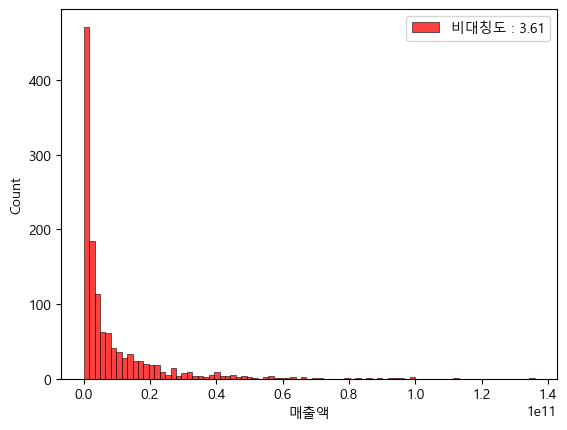

In [384]:
g = sns.histplot(train_df['매출액'], color = 'r', label = '비대칭도 : %.2f'%(train_df['매출액'].skew()))
g = g.legend(loc = 'best')

데이터를 정규분포에 근사시키기 위해 왜도가 높은 '매출액' 변수를 조정해야한다.

정규분포에 근사하는 이유는 모델링시 사용할 '사이킷런'은 데이터들이 정규분포를 따른다고 가정하고 모델을 생성하기 때문에 모델의 고도화를 위해 데이터들을 정규분포에 근사시킬 필요가 있다.

## Object 변수 관찰

### Top 10 영화 배급사

In [385]:
train_df['배급사'].value_counts()

(주)씨제이이엔엠               120
롯데쇼핑㈜롯데엔터테인먼트           112
워너브러더스 코리아(주)            97
유니버설픽쳐스인터내셔널 코리아(유)      89
(주)넥스트엔터테인먼트월드(NEW)      87
                       ... 
브에나비스타인터내셔널코리아/월트디즈니      1
(주)라이크콘텐츠                 1
주식회사 우리네트웍스               1
(주)엠케이픽처스                 1
(주)케이알씨지                  1
Name: 배급사, Length: 112, dtype: int64

In [386]:
train_df[train_df['배급사'].str.contains('CGV')][['배급사']]

,배급사
146,씨제이 씨지브이(CJ CGV)(주)
263,씨제이 씨지브이(CJ CGV)(주)
288,CGV아트하우스
373,CGV아트하우스
382,CGV아트하우스
588,CGV아트하우스
597,씨제이 씨지브이(CJ CGV)(주)
613,CGV아트하우스
654,CGV아트하우스
721,씨제이 씨지브이(CJ CGV)(주)


In [247]:
test_df['배급사'].value_counts()

롯데쇼핑㈜롯데엔터테인먼트          91
(주)씨제이이엔엠              75
유니버설픽쳐스인터내셔널 코리아(유)    62
워너브러더스 코리아(주)          55
(주)넥스트엔터테인먼트월드(NEW)    54
                       ..
㈜T-JOY                  1
CJ 엔터테인먼트               1
주식회사 해리슨앤컴퍼니            1
(주)포켓몬코리아               1
㈜코리아스크린                 1
Name: 배급사, Length: 101, dtype: int64

In [246]:
test_df[test_df['배급사'].str.contains('CGV')][['배급사']]

,배급사
49,CGV ICECON
56,CGV ICECON
221,CGV ICECON
222,씨제이 씨지브이(CJ CGV)(주)
248,CGV아트하우스
347,CGV아트하우스
352,씨제이 씨지브이(CJ CGV)(주)
422,씨제이 씨지브이(CJ CGV)(주)
620,CGV아트하우스
662,씨제이 씨지브이(CJ CGV)(주)


In [387]:
distributor_top10 = train_df.groupby('배급사', as_index=False).agg(count = ('배급사', 'count')).sort_values('count', ascending=False).head(10)
distributor_top10

,배급사,count
27,(주)씨제이이엔엠,120
73,롯데쇼핑㈜롯데엔터테인먼트,112
91,워너브러더스 코리아(주),97
97,유니버설픽쳐스인터내셔널 코리아(유),89
3,(주)넥스트엔터테인먼트월드(NEW),87
20,(주)쇼박스,74
99,이십세기폭스코리아(주),73
61,CJ ENM,53
111,한국소니픽쳐스릴리징브에나비스타영화㈜,45
94,월트디즈니컴퍼니코리아 유한책임회사,36


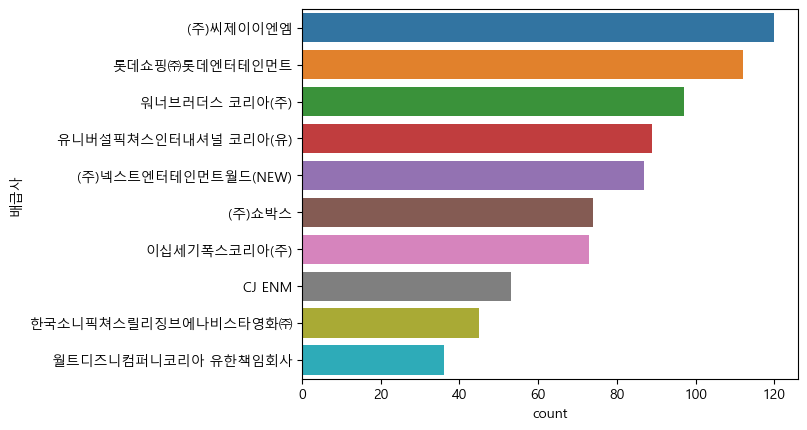

In [388]:
distributor_top10 = sns.barplot(data = distributor_top10, y = '배급사', x = 'count')
distributor_top10;

(주)씨제이이엔엠과 CJ ENM이 나눠져 있기에 둘을 통합시키기로 하며, **구글 검색 기준**으로 구글에 나와있는 회사명('CJ ENM')으로 변경한다.

In [389]:
for i in range(len(train_df)):
    if train_df['배급사'][i] == '(주)씨제이이엔엠':
        train_df['배급사'][i] = 'CJ ENM'

In [390]:
distributor_top10 = train_df.groupby('배급사', as_index=False).agg(count = ('배급사', 'count')).sort_values('count', ascending=False).head(10)
distributor_top10

,배급사,count
60,CJ ENM,173
72,롯데쇼핑㈜롯데엔터테인먼트,112
90,워너브러더스 코리아(주),97
96,유니버설픽쳐스인터내셔널 코리아(유),89
3,(주)넥스트엔터테인먼트월드(NEW),87
20,(주)쇼박스,74
98,이십세기폭스코리아(주),73
110,한국소니픽쳐스릴리징브에나비스타영화㈜,45
93,월트디즈니컴퍼니코리아 유한책임회사,36
26,(주)싸이더스,25


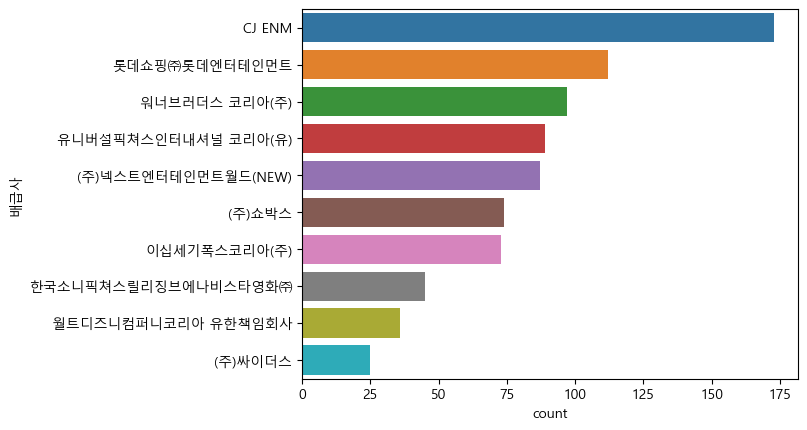

In [391]:
distributor_top10 = sns.barplot(data = distributor_top10, y = '배급사', x = 'count')
distributor_top10;

CJ ENM이 **전체 영화 배급의 13% 이상**을 차지하고 있으며,</br>CJ ENM과 롯데쇼핑㈜롯데엔터테인먼트가 **전체 영화 배급의 22% 이상**을 차지하고 있다.

### 장르

In [392]:
genre = train_df.groupby('장르', as_index=False).agg(count = ('장르', 'count')).sort_values('count', ascending=False)
genre

,장르,count
14,액션,271
13,애니메이션,219
6,드라마,204
16,코미디,126
11,범죄,82
3,공포,70
7,멜로/로맨스,68
17,판타지,38
12,스릴러,38
8,모험,36


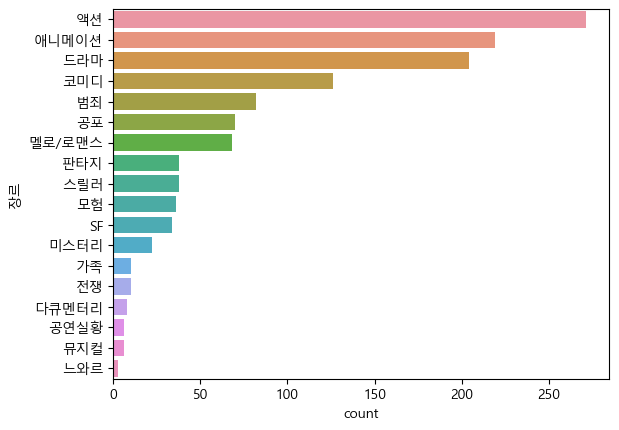

In [393]:
genreGraph = sns.barplot(data = genre, y = '장르', x = 'count')
genreGraph;

총 18개의 장르 중에서 상위 3개의 장르가 시장의 **55% 이상**을 차지하고 있다.

### 개봉월

In [394]:
month = train_df.groupby('개봉월', as_index=False).agg(count = ('개봉월', 'count')).sort_values('count', ascending=False)
month

,개봉월,count
11,12,136
1,2,127
8,9,116
0,1,115
7,8,111
9,10,111
10,11,100
3,4,91
2,3,90
6,7,90


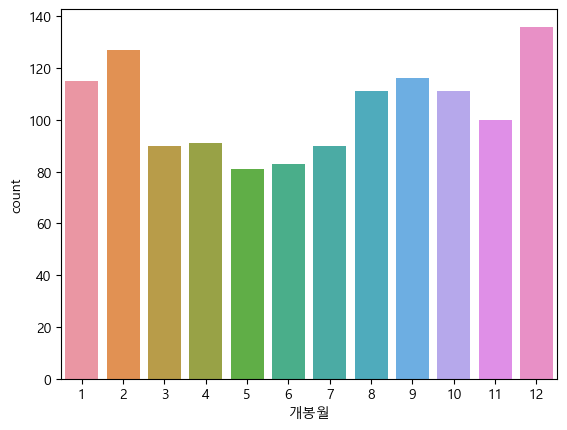

In [395]:
monthGraph = sns.barplot(data = month, x = '개봉월', y = 'count')
monthGraph;

**5월**에 가장 적은 영화가 개봉했으며, </br> **12월**에 가장 많은 영화가 개봉했다.

### 개봉 계절

In [396]:
season = train_df.groupby('계절', as_index=False).agg(count = ('계절', 'count')).sort_values('count', ascending=False)
season

,계절,count
1,겨울,377
0,가을,328
3,여름,284
2,봄,262


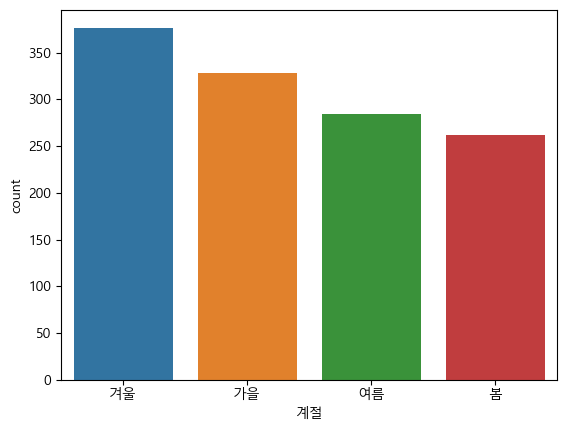

In [397]:
seasonGraph = sns.barplot(data = season, x = '계절', y = 'count')
seasonGraph;

겨울 개봉 영화 횟수가 봄에 비해 약 **1.5배**이다. 

### 연령등급

In [398]:
screening_rat = train_df.groupby('연령등급', as_index=False).agg(count = ('연령등급', 'count')).sort_values('count', ascending=False)
screening_rat

,연령등급,count
1,15세 관람가,455
0,12세 관람가,325
2,전체 관람가,282
3,청소년 관람불가,189


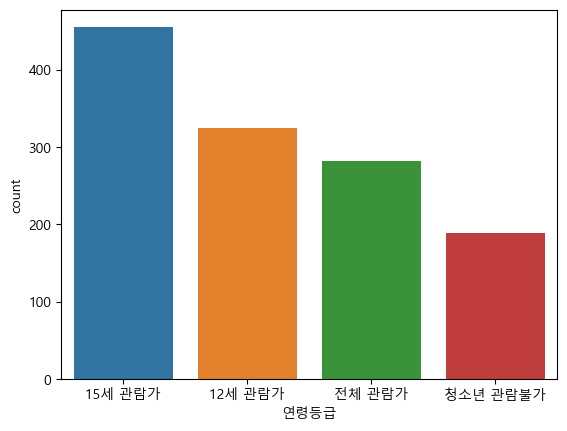

In [399]:
screening_ratGraph = sns.barplot(data = screening_rat, x = '연령등급', y = 'count')
screening_ratGraph;

**15세 이상 관람객**을 대상으로 하는 영화가 </br>
**청소년 관람불가** 영화보다 **2배 이상** 많다.

### 국적 Top10

In [400]:
country = train_df.groupby('대표국적', as_index=False).agg(count = ('대표국적', 'count')).sort_values('count', ascending=False).head(10)
country

,대표국적,count
6,미국,603
18,한국,458
13,일본,91
10,영국,26
17,프랑스,22
9,스페인,9
14,중국,9
20,홍콩,6
5,러시아,6
4,독일,6


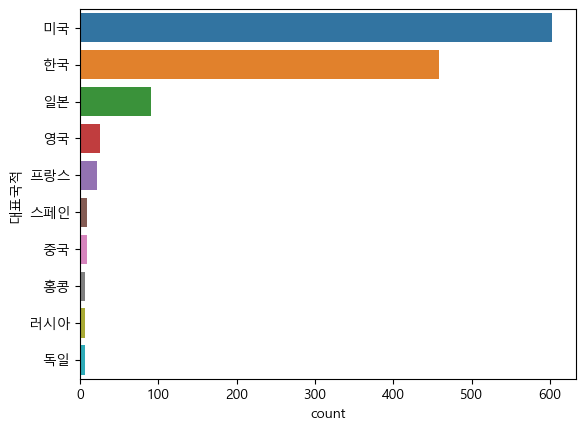

In [401]:
countryGraph = sns.barplot(data = country, y = '대표국적', x = 'count')
countryGraph;

미국 영화 개봉 수가 한국 영화 개봉 수보다 많으며(**약 1.3배**),</br>
미국과 3위인 일본의 차이는 **약 6.1배**,</br>
한국과 일본의 차이는 **약 5배**

## float 변수 관찰

In [402]:
train_df['순위']=train_df['순위'].astype('float')
train_df['매출액']=train_df['매출액'].astype('float')
train_df['관객수']=train_df['관객수'].astype('float')
train_df['스크린수']=train_df['스크린수'].astype('float')
train_df['상영횟수']=train_df['상영횟수'].astype('float')
train_df['러닝타임']=train_df['러닝타임'].astype('float')
train_df['개봉월']=train_df['개봉월'].astype('float')

In [403]:
train_df.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,76.0,해피 데스데이 2 유,2019-02-14,3437809200.0,0.0,412850.0,657.0,18254.0,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,공포,100.0,크리스토퍼 랜던,2.0,겨울
1,28.0,목격자,2018-08-15,21737061097.0,0.0,2524720.0,1021.0,71403.0,한국,한국,(주)넥스트엔터테인먼트월드(NEW),15세 관람가,스릴러,111.0,조규장,8.0,여름
2,28.0,나니아 연대기:캐스피언 왕자,2008-05-15,9236619000.0,0.0,1468903.0,604.0,43010.0,미국,"미국,영국",한국소니픽쳐스릴리징브에나비스타영화㈜,전체 관람가,판타지,145.0,앤드류 애덤슨,5.0,봄
3,40.0,그 여자 작사 그 남자 작곡,2007-02-28,6759412500.0,0.0,1063950.0,153.0,28830.0,미국,미국,주식회사 해리슨앤컴퍼니,12세 관람가,멜로/로맨스,103.0,마크 로렌스,2.0,겨울
4,30.0,박열,2017-06-28,18093639795.0,0.0,2359206.0,1176.0,78499.0,한국,한국,플러스엠 엔터테인먼트,12세 관람가,드라마,129.0,이준익,6.0,여름


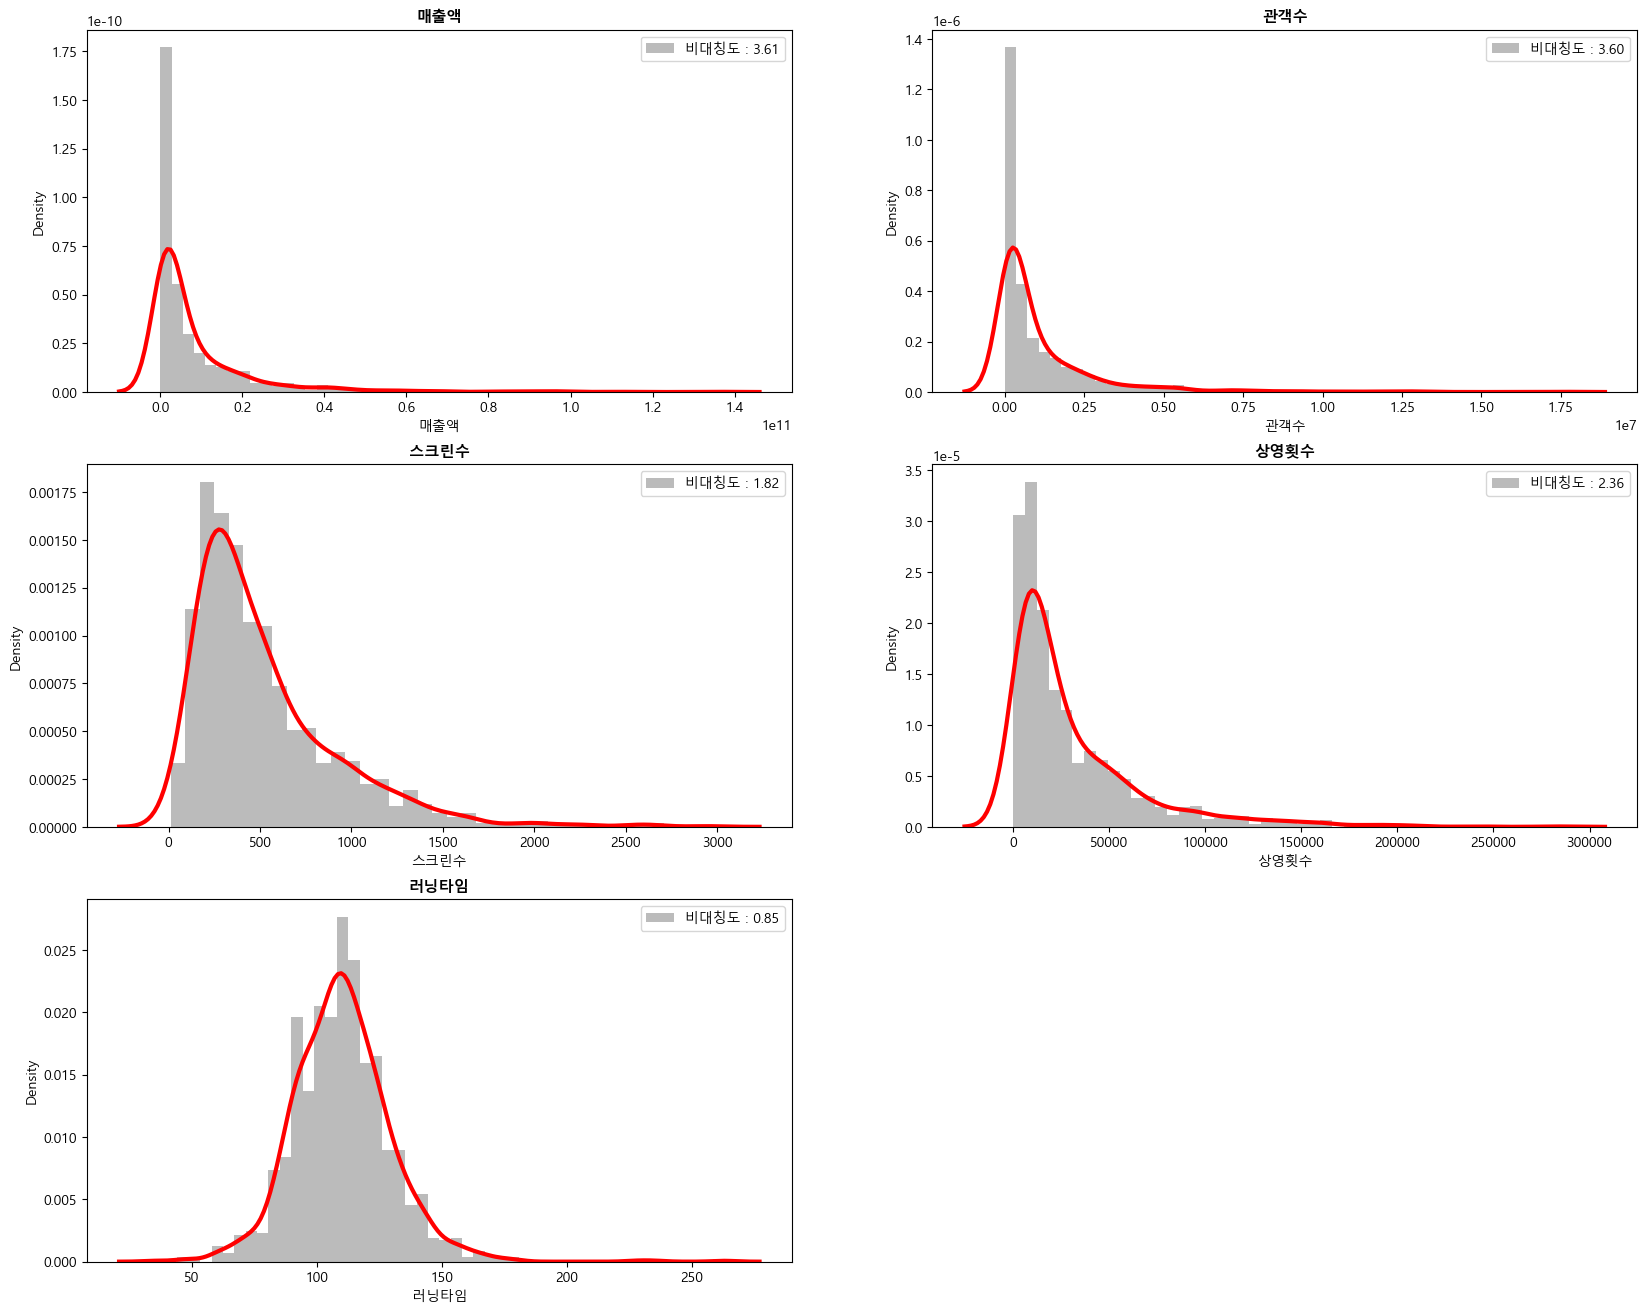

In [404]:
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(nrows=3, ncols=2,
                       height_ratios=[5, 5, 5], 
                       width_ratios=[5, 5])

ax = plt.subplot(gs[0])
sns.distplot(train_df['매출액'], label = '비대칭도 : %.2f'%(train_df['매출액'].skew()), kde_kws = {'color' : 'r', 'lw' : 3}, hist_kws = {'color' : '#575757'})
ax.set_title('매출액', fontsize=11, fontweight = 'bold')                   
plt.legend(loc = 'best')

ax = plt.subplot(gs[1])
sns.distplot(train_df['관객수'], label = '비대칭도 : %.2f'%(train_df['관객수'].skew()), kde_kws = {'color' : 'r', 'lw' : 3}, hist_kws = {'color' : '#575757'})
ax.set_title('관객수', fontsize=11, fontweight = 'bold')                   
plt.legend(loc = 'best')

ax = plt.subplot(gs[2])
sns.distplot(train_df['스크린수'], label = '비대칭도 : %.2f'%(train_df['스크린수'].skew()), kde_kws = {'color' : 'r', 'lw' : 3}, hist_kws = {'color' : '#575757'})
ax.set_title('스크린수', fontsize=11, fontweight = 'bold')                   
plt.legend(loc = 'best')

ax = plt.subplot(gs[3])
sns.distplot(train_df['상영횟수'], label = '비대칭도 : %.2f'%(train_df['상영횟수'].skew()), kde_kws = {'color' : 'r', 'lw' : 3}, hist_kws = {'color' : '#575757'})
ax.set_title('상영횟수', fontsize=11, fontweight = 'bold')                   
plt.legend(loc = 'best')

ax = plt.subplot(gs[4])
sns.distplot(train_df['러닝타임'], label = '비대칭도 : %.2f'%(train_df['러닝타임'].skew()), kde_kws = {'color' : 'r', 'lw' : 3}, hist_kws = {'color' : '#575757'})
ax.set_title('러닝타임', fontsize=11, fontweight = 'bold')                   
plt.legend(loc = 'best')

'매출액', '관객수'의 왜도가 높기 때문에 모델링시 조정하는 것이 필요해보인다.

## 상관계수

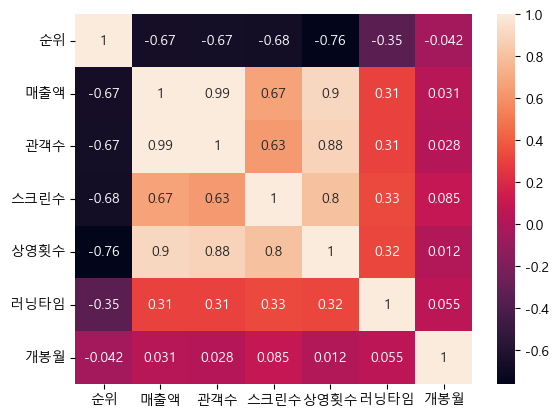

In [405]:
sns.heatmap(train.corr(), annot = True);

현재 **숫자 데이터**만을 봤을 때, **매출액**과 관계가 깊은 순은,</br></br>
**관객수 > 상영횟수 > 스크린수 > 러닝타임 > 개봉 월 > 순위(관련 없음)**

In [552]:
train.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,76,해피 데스데이 2 유,2019-02-14,3437809200,0.0,412850,657,18254,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,3,100,크리스토퍼 랜던,2,겨울
1,28,목격자,2018-08-15,21737061097,0.0,2524720,1021,71403,한국,한국,(주)넥스트엔터테인먼트월드(NEW),15세 관람가,12,111,조규장,8,여름
2,28,나니아 연대기:캐스피언 왕자,2008-05-15,9236619000,0.0,1468903,604,43010,미국,"미국,영국",한국소니픽쳐스릴리징브에나비스타영화㈜,전체 관람가,17,145,앤드류 애덤슨,5,봄
3,40,그 여자 작사 그 남자 작곡,2007-02-28,6759412500,0.0,1063950,153,28830,미국,미국,주식회사 해리슨앤컴퍼니,12세 관람가,7,103,마크 로렌스,2,겨울
4,30,박열,2017-06-28,18093639795,0.0,2359206,1176,78499,한국,한국,플러스엠 엔터테인먼트,12세 관람가,6,129,이준익,6,여름


## Modeling

### 1. LGBMRegressor

In [547]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [548]:
features = ['러닝타임', '관객수', '스크린수', '상영횟수']
target = ['매출액']

In [556]:
train[target]

,매출액
0,3437809200
1,21737061097
2,9236619000
3,6759412500
4,18093639795
...,...
1246,6481379657
1247,790848700
1248,81358690
1249,80053500


In [553]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [557]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [465]:
singleLGBM = test_df.copy()

In [466]:
singleLGBM['매출액'] = model.predict(X_test)

In [468]:
singleLGBM

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,매출액
0,73,샴,2007-07-17,0.0,496084,145,12084,태국,태국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,공포,93,반종 피산다나쿤,7,여름,2739189864.6
1,135,라스트 엑소시즘,2010-12-01,0.0,103410,171,8016,미국,미국,(주)시너지하우스 (시너지),15세 관람가,공포,88,다니엘 스탬,12,겨울,885090323.9
2,88,건파우더 밀크셰이크,2021-09-08,0.0,37496,542,7867,프랑스,프랑스,(주)씨제이이엔엠,청소년 관람불가,액션,115,나봇 파푸샤도,9,가을,279612267.8
3,105,남과 여,2016-02-25,0.0,203775,449,9790,한국,한국,(주)쇼박스,청소년 관람불가,멜로/로맨스,115,이윤기,2,겨울,1693006207.5
4,33,피끓는 청춘,2014-01-22,0.80%,1676040,679,36082,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,코미디,121,이연우,1,겨울,12133138446.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,123,찰리윌슨의 전쟁,2008-02-06,0.0,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,드라마,97,마이크 니콜스,2,겨울,1141666649.9
831,79,헬보이 2 : 골든 아미,2008-09-25,0.0,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,SF,120,길예르모 델 토로,9,가을,2726512323.2
832,72,아이스 에이지: 지구 대충돌,2016-07-20,0.0,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,애니메이션,94,마이크 트메이어,7,여름,4100713753.1
833,144,Mr.아이돌,2011-11-03,0,74261,311,8669,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,12세 관람가,드라마,114,라희찬,11,가을,564357860.6


In [474]:
movieShuffle[movieShuffle['영화명'] == '아이스 에이지: 지구 대충돌']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
2083,72,아이스 에이지: 지구 대충돌,2016-07-20,4092484600,0.0,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,애니메이션,94.0,마이크 트메이어,7.0,여름


### k-fold 교차검증

In [477]:
from sklearn.model_selection import KFold

In [478]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [479]:
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

1000 251


train_idx은 **1251개**중 **4등분**인 1000개 val_idx는 **1등분**인 251개로 나눠져있다.

In [480]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

[100]	valid_0's l2: 2.61448e+18
[100]	valid_0's l2: 2.08181e+19
[100]	valid_0's l2: 2.85903e+18
[100]	valid_0's l2: 5.04702e+18
[200]	valid_0's l2: 5.34606e+18
[100]	valid_0's l2: 9.92035e+18
[200]	valid_0's l2: 9.82328e+18


In [481]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [482]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [483]:
preds

[array([2.93571954e+09, 7.48485243e+08, 3.42381443e+08, 1.69203054e+09,
        1.20303939e+10, 9.23134703e+08, 1.82771599e+09, 6.48384845e+09,
        8.90229920e+09, 2.31747169e+09, 1.39149537e+09, 8.01118205e+10,
        5.83182430e+08, 1.39839730e+10, 2.63330966e+09, 3.76152311e+09,
        1.96164716e+09, 1.12489984e+09, 8.63174458e+08, 2.04342816e+09,
        1.08953466e+10, 1.19766018e+08, 5.55690716e+08, 1.09744409e+09,
        1.60308835e+09, 8.65774816e+08, 4.10509400e+07, 2.19180973e+09,
        7.64699028e+09, 9.31626061e+08, 9.26457572e+08, 3.61458013e+09,
        3.20191131e+10, 1.24935527e+09, 1.89987466e+10, 4.22875596e+09,
        1.94486011e+09, 1.10231300e+09, 6.87543090e+09, 8.89485884e+08,
        7.29271872e+08, 2.79432911e+09, 9.35493021e+08, 2.33324649e+10,
        7.44974623e+08, 3.73712720e+10, 1.24096074e+09, 7.96880783e+09,
        9.61616612e+09, 9.09266049e+08, 7.09630838e+08, 1.59615969e+09,
        6.04698828e+09, 6.36371588e+09, 1.87043298e+10, 4.490235

In [485]:
kfoldLightGBM = test_df.copy()

In [486]:
kfoldLightGBM['매출액'] = np.mean(preds, axis = 0)

In [527]:
kfoldLightGBM

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,매출액
0,73,샴,2007-07-17,0.0,496084,145,12084,태국,태국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,공포,93,반종 피산다나쿤,7,여름,2935719541.6
1,135,라스트 엑소시즘,2010-12-01,0.0,103410,171,8016,미국,미국,(주)시너지하우스 (시너지),15세 관람가,공포,88,다니엘 스탬,12,겨울,748485243.2
2,88,건파우더 밀크셰이크,2021-09-08,0.0,37496,542,7867,프랑스,프랑스,(주)씨제이이엔엠,청소년 관람불가,액션,115,나봇 파푸샤도,9,가을,342381442.8
3,105,남과 여,2016-02-25,0.0,203775,449,9790,한국,한국,(주)쇼박스,청소년 관람불가,멜로/로맨스,115,이윤기,2,겨울,1692030543.6
4,33,피끓는 청춘,2014-01-22,0.80%,1676040,679,36082,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,코미디,121,이연우,1,겨울,12030393936.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,123,찰리윌슨의 전쟁,2008-02-06,0.0,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,드라마,97,마이크 니콜스,2,겨울,1154229034.4
831,79,헬보이 2 : 골든 아미,2008-09-25,0.0,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,SF,120,길예르모 델 토로,9,가을,2610920087.6
832,72,아이스 에이지: 지구 대충돌,2016-07-20,0.0,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,애니메이션,94,마이크 트메이어,7,여름,4120423743.1
833,144,Mr.아이돌,2011-11-03,0,74261,311,8669,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,12세 관람가,드라마,114,라희찬,11,가을,539651275.2


## 라벨링

In [498]:
features

['러닝타임', '관객수', '스크린수', '상영횟수']

In [501]:
train.장르

0           공포
1          스릴러
2          판타지
3       멜로/로맨스
4          드라마
         ...  
1246       드라마
1247     애니메이션
1248     애니메이션
1249     애니메이션
1250     애니메이션
Name: 장르, Length: 1251, dtype: object

In [502]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
train['장르'] = le.fit_transform(train['장르'])

In [503]:
train['장르']

0        3
1       12
2       17
3        7
4        6
        ..
1246     6
1247    13
1248    13
1249    13
1250    13
Name: 장르, Length: 1251, dtype: int32

In [504]:
test['장르'] = le.transform(test['장르'])

In [505]:
test['장르']

0       3
1       3
2      14
3       7
4      16
       ..
830     6
831     0
832    13
833     6
834     1
Name: 장르, Length: 835, dtype: int32

In [507]:
features = ['러닝타임', '관객수', '스크린수', '상영횟수', '장르']

In [508]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [509]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

[100]	valid_0's l2: 2.74e+18
[100]	valid_0's l2: 2.10992e+19
[100]	valid_0's l2: 2.88816e+18
[100]	valid_0's l2: 5.15406e+18
[200]	valid_0's l2: 5.3639e+18
[100]	valid_0's l2: 9.89061e+18
[200]	valid_0's l2: 1.01408e+19


In [510]:
X_test.head()

,러닝타임,관객수,스크린수,상영횟수,장르
0,93,496084,145,12084,3
1,88,103410,171,8016,3
2,115,37496,542,7867,14
3,115,203775,449,9790,7
4,121,1676040,679,36082,16


In [511]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
len(preds)

5

In [513]:
feLightGBM = test.copy()

In [514]:
feLightGBM['매출액'] = np.mean(preds, axis = 0)

In [526]:
feLightGBM

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,매출액
0,73,샴,2007-07-17,0.0,496084,145,12084,태국,태국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,3,93,반종 피산다나쿤,7,여름,3016846557.9
1,135,라스트 엑소시즘,2010-12-01,0.0,103410,171,8016,미국,미국,(주)시너지하우스 (시너지),15세 관람가,3,88,다니엘 스탬,12,겨울,869352773.0
2,88,건파우더 밀크셰이크,2021-09-08,0.0,37496,542,7867,프랑스,프랑스,(주)씨제이이엔엠,청소년 관람불가,14,115,나봇 파푸샤도,9,가을,319403972.7
3,105,남과 여,2016-02-25,0.0,203775,449,9790,한국,한국,(주)쇼박스,청소년 관람불가,7,115,이윤기,2,겨울,1633571911.2
4,33,피끓는 청춘,2014-01-22,0.80%,1676040,679,36082,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,16,121,이연우,1,겨울,11884610043.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,123,찰리윌슨의 전쟁,2008-02-06,0.0,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,6,97,마이크 니콜스,2,겨울,1177337573.0
831,79,헬보이 2 : 골든 아미,2008-09-25,0.0,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,0,120,길예르모 델 토로,9,가을,2801249246.8
832,72,아이스 에이지: 지구 대충돌,2016-07-20,0.0,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,13,94,마이크 트메이어,7,여름,4092480468.9
833,144,Mr.아이돌,2011-11-03,0,74261,311,8669,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,12세 관람가,6,114,라희찬,11,가을,555842039.5


## GridSearchCV

In [516]:
from sklearn.model_selection import GridSearchCV

In [517]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

In [518]:
params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}

gs = GridSearchCV(estimator=model,
                 param_grid=params,
                  scoring= 'neg_mean_squared_error',
                  cv = k_fold)

In [570]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [520]:
gs.best_params_

{'learning_rate': 0.01, 'min_child_samples': 20}

In [521]:
model = lgb.LGBMRegressor(random_state=777,n_estimators=1000, learning_rate=0.01, min_child_samples=20)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

[100]	valid_0's l2: 1.72138e+19
[200]	valid_0's l2: 3.63531e+18
[300]	valid_0's l2: 2.32571e+18
[400]	valid_0's l2: 2.21068e+18
[500]	valid_0's l2: 2.24601e+18
[100]	valid_0's l2: 5.8102e+19
[200]	valid_0's l2: 2.84341e+19
[300]	valid_0's l2: 2.33684e+19
[400]	valid_0's l2: 2.21033e+19
[500]	valid_0's l2: 2.14839e+19
[600]	valid_0's l2: 2.11115e+19
[700]	valid_0's l2: 2.08543e+19
[800]	valid_0's l2: 2.07697e+19
[100]	valid_0's l2: 1.37394e+19
[200]	valid_0's l2: 2.51938e+18
[300]	valid_0's l2: 1.71341e+18
[400]	valid_0's l2: 1.87242e+18
[100]	valid_0's l2: 3.55475e+19
[200]	valid_0's l2: 1.05831e+19
[300]	valid_0's l2: 6.52187e+18
[400]	valid_0's l2: 5.68453e+18
[500]	valid_0's l2: 5.4467e+18
[600]	valid_0's l2: 5.37303e+18
[700]	valid_0's l2: 5.37788e+18
[800]	valid_0's l2: 5.26767e+18
[900]	valid_0's l2: 5.18614e+18
[1000]	valid_0's l2: 5.13549e+18
[100]	valid_0's l2: 5.80996e+19
[200]	valid_0's l2: 2.316e+19
[300]	valid_0's l2: 1.59547e+19
[400]	valid_0's l2: 1.37074e+19
[500]	valid

In [522]:
preds = []

for model in models:
    preds.append(model.predict(X_test))

In [523]:
gslgbm = test.copy()

In [524]:
gslgbm['매출액'] = np.mean(preds, axis=0)

In [525]:
gslgbm

,순위,영화명,개봉일,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,매출액
0,73,샴,2007-07-17,0.0,496084,145,12084,태국,태국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,3,93,반종 피산다나쿤,7,여름,3071024654.1
1,135,라스트 엑소시즘,2010-12-01,0.0,103410,171,8016,미국,미국,(주)시너지하우스 (시너지),15세 관람가,3,88,다니엘 스탬,12,겨울,932681591.8
2,88,건파우더 밀크셰이크,2021-09-08,0.0,37496,542,7867,프랑스,프랑스,(주)씨제이이엔엠,청소년 관람불가,14,115,나봇 파푸샤도,9,가을,344665819.7
3,105,남과 여,2016-02-25,0.0,203775,449,9790,한국,한국,(주)쇼박스,청소년 관람불가,7,115,이윤기,2,겨울,1642653107.9
4,33,피끓는 청춘,2014-01-22,0.80%,1676040,679,36082,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,16,121,이연우,1,겨울,11833678590.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,123,찰리윌슨의 전쟁,2008-02-06,0.0,169669,149,7054,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),15세 관람가,6,97,마이크 니콜스,2,겨울,1169476691.6
831,79,헬보이 2 : 골든 아미,2008-09-25,0.0,399570,282,17563,미국,"미국,독일",유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,0,120,길예르모 델 토로,9,가을,2766609080.6
832,72,아이스 에이지: 지구 대충돌,2016-07-20,0.0,553760,580,13018,미국,미국,이십세기폭스코리아(주),전체 관람가,13,94,마이크 트메이어,7,여름,4098021144.2
833,144,Mr.아이돌,2011-11-03,0,74261,311,8669,한국,한국,롯데쇼핑㈜롯데엔터테인먼트,12세 관람가,6,114,라희찬,11,가을,545883158.2


In [558]:
X_test.values

array([[    93, 496084,    145,  12084],
       [    88, 103410,    171,   8016],
       [   115,  37496,    542,   7867],
       ...,
       [    94, 553760,    580,  13018],
       [   114,  74261,    311,   8669],
       [    93, 489187,    235,   9720]], dtype=int64)

## 선형회귀모델

In [562]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [564]:
y_pred = reg.predict(X_test)
y_pred

array([[ 3.15224165e+09],
       [ 3.03828949e+08],
       [ 3.74492340e+08],
       [ 1.43984272e+09],
       [ 1.30583418e+10],
       [ 4.63025950e+08],
       [ 1.61817867e+09],
       [ 6.49022024e+09],
       [ 9.78523351e+09],
       [ 2.61502174e+09],
       [ 1.20993137e+09],
       [ 1.26689219e+11],
       [-1.50211425e+08],
       [ 1.47739901e+10],
       [ 3.23590496e+09],
       [ 4.12558769e+09],
       [ 1.77308873e+09],
       [ 6.22814974e+08],
       [ 2.07321438e+08],
       [ 2.34575663e+09],
       [ 1.13701306e+10],
       [-7.72102797e+08],
       [-1.86906313e+08],
       [ 7.34328188e+08],
       [ 1.43005578e+09],
       [ 4.44745862e+08],
       [-8.41977298e+08],
       [ 1.91748539e+09],
       [ 7.89624274e+09],
       [ 6.02503685e+08],
       [ 2.51789080e+08],
       [ 4.01046580e+09],
       [ 3.45992994e+10],
       [ 8.39480422e+08],
       [ 2.22914490e+10],
       [ 4.46321115e+09],
       [ 1.75157266e+09],
       [ 1.13093773e+09],
       [ 7.2

In [565]:
print('weight:', reg.coef_) #가중치
print('bias:', reg.intercept_)

weight: [[-6036669.93568824     7240.84405973  1924669.75835819    20979.90756229]]
bias: [-4.11013248e+08]


In [567]:
#훈련모델로 평가
reg.score(X_train, y_train)

0.9926767816173947